Project 9 : A Data Analysis of Your Own 
Name:Yousef Aljarmouzi

Part 1: Choosing a topic and finding data
I chose to explore the "Titanic: Machine Learning from Disaster" dataset, which is a classic dataset often used for predictive modeling. This dataset contains information about passengers on the Titanic, including whether they survived or not, age, gender, ticket class, etc.

Dataset:
    Source: Kaggle  https://www.kaggle.com/c/titanic/data
    Format: CSV
    Link to Dataset: https://www.kaggle.com/account/login?returnUrl=%2Fcompetitions%2Ftitanic

Part 2: Conduct your Analysis & Visualization

Questions:

    What is the overall survival rate of passengers on the Titanic?
    How does the survival rate vary by gender?
    Is there a correlation between age and survival?
    What is the distribution of passenger classes on the Titanic?
    How does the embarkation point relate to the survival rate?

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Load the Titanic dataset into a pandas DataFrame
df_titanic = pd.read_csv("train.csv")

In [12]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:

# Data Wrangling
# let's Check for missing values
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

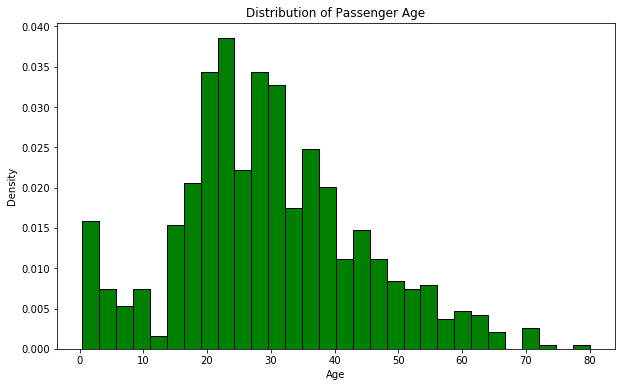

In [14]:
#following the question:  What is the distribution of passenger classes on the Titanic? 
#let's go a head and discover the passenger's ages
plt.figure(figsize=(10, 6))
plt.hist(df_titanic['Age'].dropna(), bins=30, edgecolor='black', color='green', density=True)
plt.title('Distribution of Passenger Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

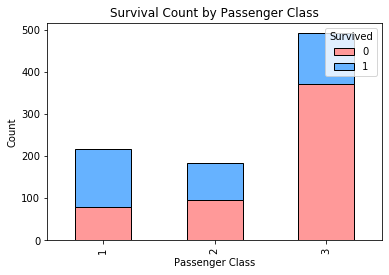

In [15]:
# Survival rate based on passenger class

# will be using groupby so we can Group the Titanic dataset by both 'Pclass' and 'Survived' columns
# will aslo count the occurrences of each combination and create a two-level index DataFrame
survival_by_class = df_titanic.groupby(['Pclass', 'Survived']).size().unstack()

# Secondaly will plot a stacked bar chart using the created DataFrame
# Each bar will represent the count of passengers based on their survival status within each passenger class
## asked Ai what is the code for a shade of red and blue and told me #FF9999', '#66B2FF .
survival_by_class.plot(kind='bar', stacked=True, color=['#FF9999', '#66B2FF'], edgecolor='black')

# now will just add title and axis labels to the plot
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')

# im also adding a legend to the plot, specifying the labels and position so it can be easier for the reader to understand the plot
plt.legend(title='Survived', loc='upper right')
plt.show()


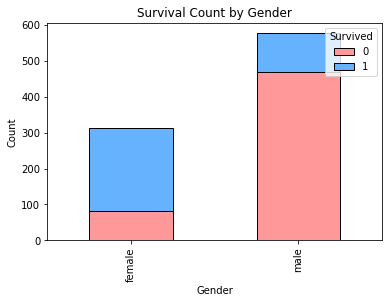

In [19]:
# will do a similar to the one above but this time is about Survival rate based on gender
survival_by_gender = df_titanic.groupby(['Sex', 'Survived']).size().unstack()
survival_by_gender.plot(kind='bar', stacked=True, color=['#FF9999', '#66B2FF'], edgecolor='black')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

In [ ]:
Above & Beyond

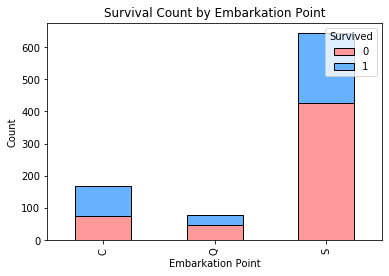

In [20]:
#Above & Beyond
# Grouped bar chart for survival rate by embarkation point
survival_by_embarkation = df_titanic.groupby(['Embarked', 'Survived']).size().unstack()
survival_by_embarkation.plot(kind='bar', stacked=True, color=['#FF9999', '#66B2FF'], edgecolor='black')
plt.title('Survival Count by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()
